<a href="https://colab.research.google.com/github/sapna-90/Project_8_Career-trends-explorer/blob/main/P8_Career_trends_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
Data = pd.read_csv(r"/content/P8_ all_upwork_jobs_2024-02-07-2024-03-24.csv")

In [3]:
Data.head(5)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [5]:
Data['is_hourly'] = Data['is_hourly'].astype('object')

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  object 
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: float64(3), object(5)
memory usage: 14.9+ MB


In [7]:
Data.duplicated().sum()

0

In [8]:
Data.isnull().sum().sort_values(ascending=False)

,0
hourly_high,146053
hourly_low,142406
budget,140937
country,5077
title,1
link,1
published_date,0
is_hourly,0


In [9]:
numerical_cols = Data.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numerical column and fill missing values
for col in numerical_cols:
    Data[col] = Data[col].fillna(Data[col].mean(0))

In [10]:
categorical_cols = Data.select_dtypes(include=['object']).columns

# Iterate through each numerical column and fill missing values
for col in categorical_cols:
    Data[col] = Data[col].fillna(Data[col].mode()[0])

<ipython-input-10-8eb52dd9d2fa>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data[col] = Data[col].fillna(Data[col].mode()[0])


In [11]:
Data.isnull().sum().sort_values(ascending=False)

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0


In [12]:
numerical_cols = Data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = Data.select_dtypes(include=['object']).columns

In [13]:
# Create the list of numerical data
numerical_data=[]
for i in Data.columns:
  if Data[i].dtype!='object':
    numerical_data.append(i)
numerical_data

['is_hourly', 'hourly_low', 'hourly_high', 'budget']

In [14]:
## now to create a list of categorical data
categorical_data=[]
for i in Data.columns:
  if Data[i].dtype=='object':
    categorical_data.append(i)
categorical_data

['title', 'link', 'published_date', 'country']

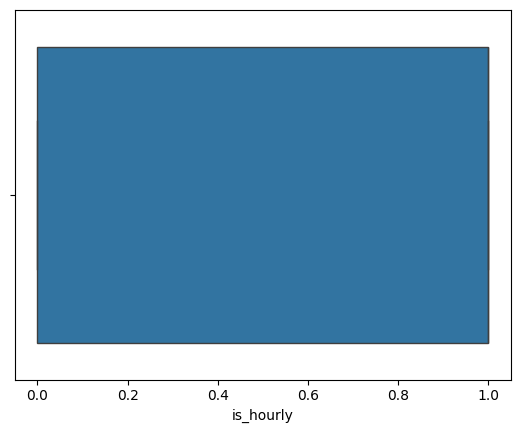

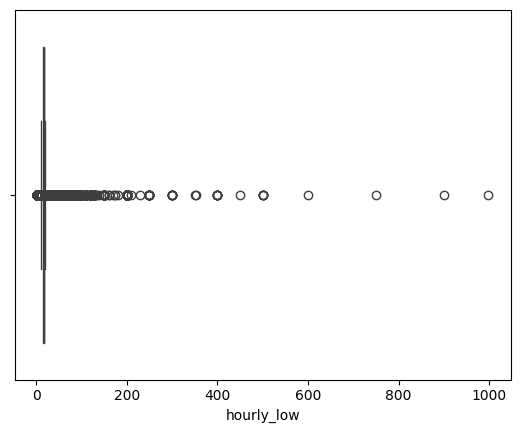

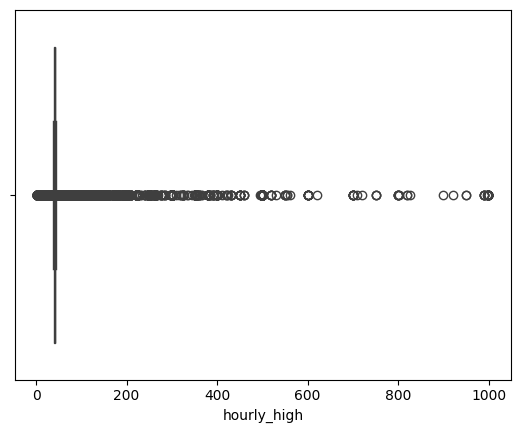

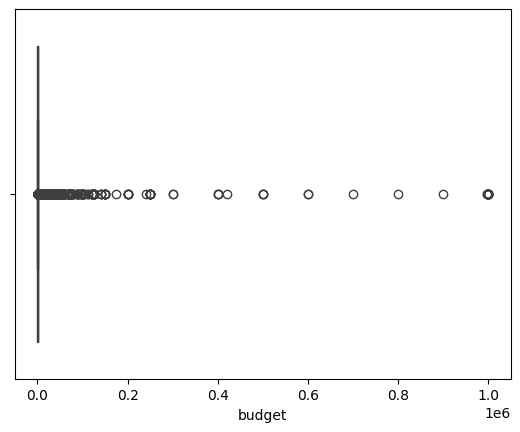

In [15]:
for i in numerical_data:
  sns.boxplot(x=i,data=Data)
  plt.show()

In [16]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define the lower and upper bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows that have outliers in the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [17]:
Data.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [18]:
columns_to_check = ['hourly_low', 'hourly_high', 'budget']

In [19]:
cleaned_data = remove_outliers(Data, columns_to_check)

In [20]:
print("Data shape before removing outliers:", Data.shape)
print("Data shape after removing outliers:", cleaned_data.shape)

Data shape before removing outliers: (244828, 8)
Data shape after removing outliers: (138452, 8)


In [21]:
cleaned_data.to_csv('Project_8.csv', index=False)

In [22]:
Cleaned_Dataset = pd.read_csv(r"/content/Project_8.csv")

In [23]:
Cleaned_Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

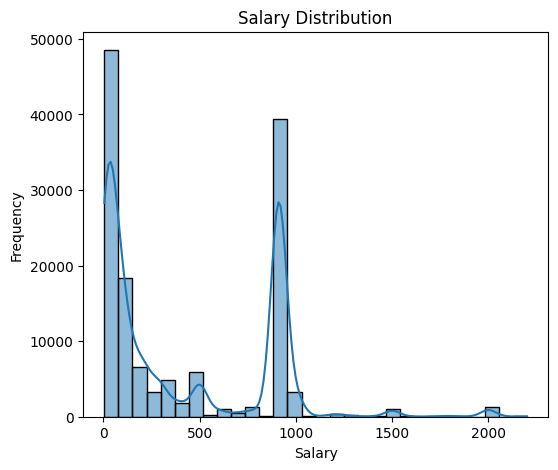

In [24]:
# Visualization: Initial overview of salary trends
plt.figure(figsize=(6, 5))
sns.histplot(Cleaned_Dataset['budget'], kde=True, bins=30)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

This visualization can help us identify the central tendency of salaries, any disparities or unusual salary ranges.

**Task 1: Analyzing Keywords and Salaries**


In [25]:
# Analyze the relationship between keywords in job titles and salaries
from wordcloud import WordCloud

In [26]:
# Extract job title keywords
job_titles = Cleaned_Dataset['title'].str.lower().str.split().explode()

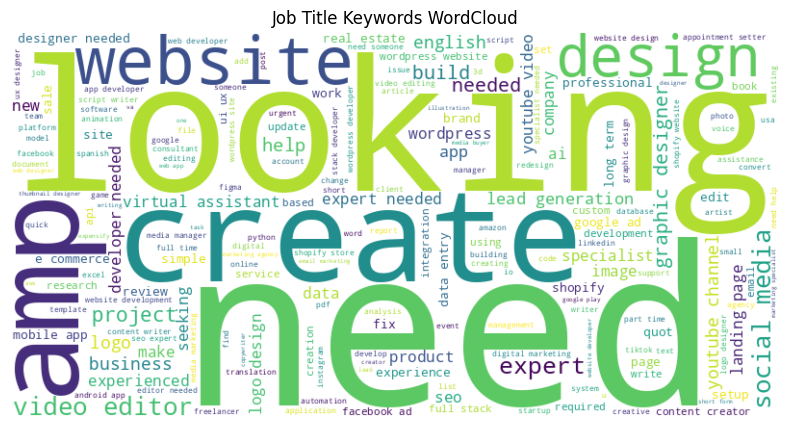

In [27]:
# Generate a WordCloud for job title keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(job_titles))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Job Title Keywords WordCloud")
plt.show()

The WordCloud is an effective way to identify the most common job titles and keywords associated with them in the dataset. It generates a WordCloud for the job title keywords, allowing us to visually explore the most frequent job titles present in the dataset.

In [28]:
# Analyze the correlation between keywords and salaries
# Create a new column with unique keywords for each job title
Cleaned_Dataset['keywords'] = Cleaned_Dataset['title'].str.lower().str.split().apply(lambda x: ','.join(set(x)))

# Group by the unique keywords and calculate the mean salary
keyword_salaries = Cleaned_Dataset.groupby('keywords')['budget'].mean().sort_values(ascending=False)

print("Top Keywords with Salaries:")
print(keyword_salaries.head(5))

Top Keywords with Salaries:
keywords
to,create,mystery,reliable,i'm,cozy,experienced,,exciting,,looking,for,ghostwriter,an,trope-driven,    2200.0
for,manager,time),(full,operations,marketing,agency                                                    2200.0
angel,2,numbers,3,and,books                                                                            2200.0
coach,fitness,and,longterm,nutrition,online                                                            2200.0
existing,platform.,the,working,kotlin:,within,with,agents                                              2200.0
Name: budget, dtype: float64


The above code analyzes the relationship between unique job title keywords and their corresponding average salaries

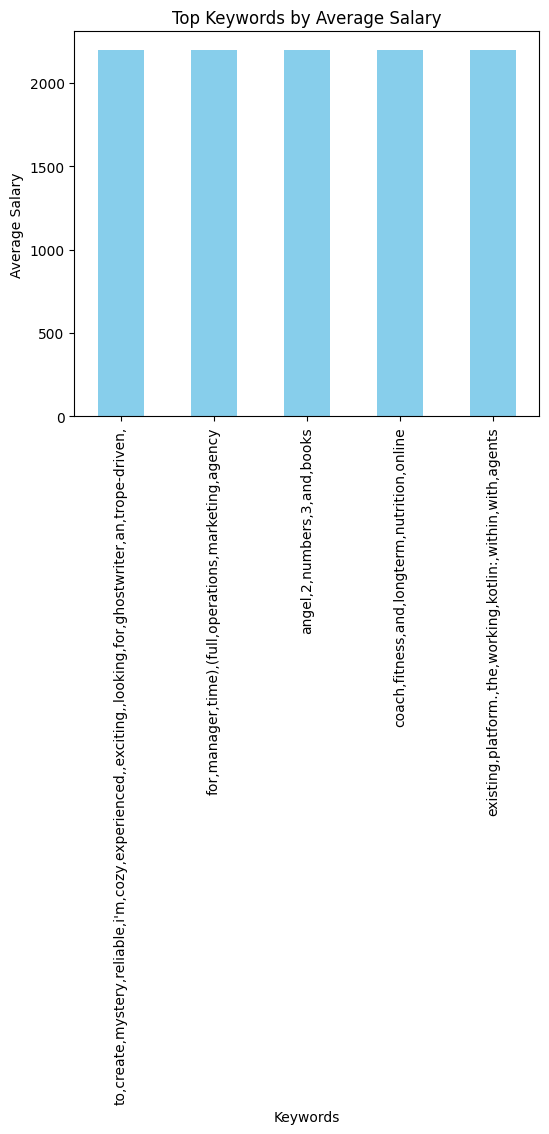

In [29]:
# Visualize top keywords by average salary
keyword_salaries.head(5).plot(kind='bar', color='skyblue', figsize=(6, 5))
plt.title("Top Keywords by Average Salary")
plt.xlabel("Keywords")
plt.ylabel("Average Salary")
plt.show()

This visualization effectively highlights the connection between job title keywords and salary trends, providing actionable insights for individuals and organizations.

**Task 2: Identifying Emerging Job Categories**

In [30]:
# Remove timezone information

Cleaned_Dataset['published_date'] = pd.to_datetime(Cleaned_Dataset['published_date'])

Cleaned_Dataset['published_date'] = Cleaned_Dataset['published_date'].dt.tz_localize(None)

In [31]:
# Analyze job categories over time
Cleaned_Dataset['published_date'] = pd.to_datetime(Cleaned_Dataset['published_date'])
job_category_trends = Cleaned_Dataset.groupby(['title', Cleaned_Dataset['published_date'].dt.to_period('M')])['title'].count().unstack(fill_value=0)

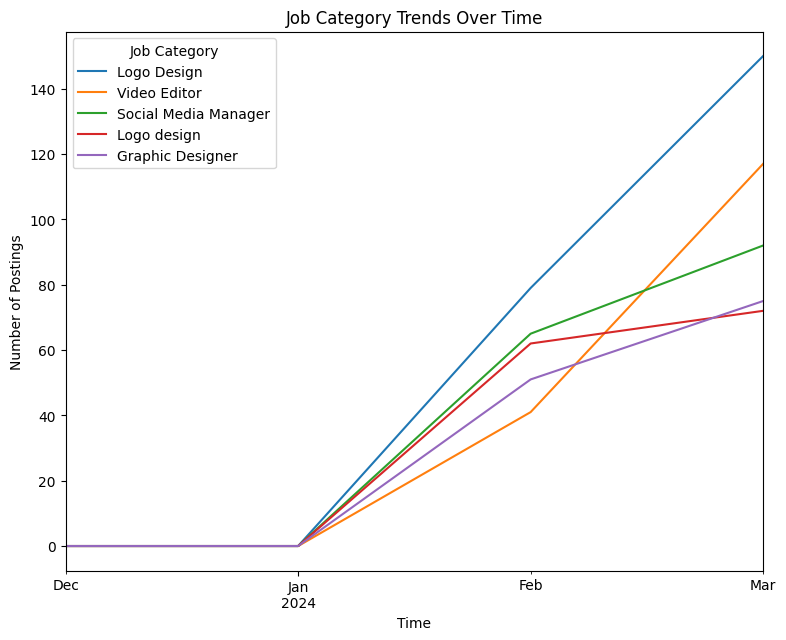

In [32]:
# Plot emerging job categories over time
top_categories = job_category_trends.sum(axis=1).nlargest(5).index  # Top 5 categories by total postings
job_category_trends.loc[top_categories].T.plot(figsize=(9, 7))
plt.title("Job Category Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Postings")
plt.legend(title="Job Category")
plt.show()

This visualization effectively highlights evolving trends in job postings, helping stakeholders identify key areas of growth and opportunity in the job market.

In [33]:
# Calculate growth rate for job categories
growth_rates = job_category_trends.iloc[:, -1] - job_category_trends.iloc[:, 0]
emerging_categories = growth_rates.sort_values(ascending=False).head(10)
print("Emerging Job Categories:")
print(emerging_categories)

Emerging Job Categories:
title
Logo Design             150
Video Editor            117
Social Media Manager     92
Graphic Designer         75
Logo design              72
Logo Designer            57
Virtual Assistant        57
Lead Generation          51
Website Development      43
YouTube Video Editor     43
dtype: int64


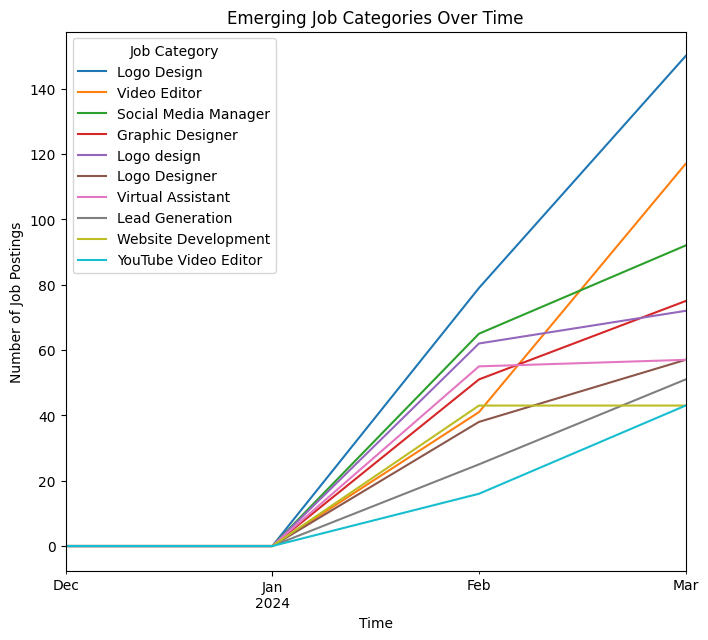

In [34]:
# Visualize time-series data
job_category_trends.loc[emerging_categories.index].T.plot(figsize=(8, 7))
plt.title("Emerging Job Categories Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Job Postings")
plt.legend(title="Job Category")
plt.show()

This visualization provides a dynamic perspective on how demand for specific emerging job categories evolves over time, offering valuable insights for career planning, hiring strategies, and market analysis.

**Task 3: Forecasting High-Demand Roles**

In [35]:
# Prepare data for regression
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()
Cleaned_Dataset['job_category_encoded'] = le.fit_transform(Cleaned_Dataset['title'])
X = Cleaned_Dataset[['job_category_encoded', 'hourly_low']]  # Example predictors
y = Cleaned_Dataset['hourly_high']  # Example target

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((110761, 2), (27691, 2), (110761,), (27691,))

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions = model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f" R2 Score {r2_score(predictions, y_test)}")
print(f" mean_squared_error {mean_squared_error(predictions, y_test)}")
print(f" Root mean_squared_error {np.sqrt(mean_squared_error(predictions, y_test))}")
print(f" mean_absolute_error {mean_absolute_error(predictions, y_test)}")

 R2 Score 0.0
 mean_squared_error 5.048709793414476e-29
 Root mean_squared_error 7.105427357601002e-15
 mean_absolute_error 7.105427357601002e-15


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [42]:
X = Cleaned_Dataset[['job_category_encoded', 'hourly_low']]  # Example predictors
y = Cleaned_Dataset['hourly_high']  # Example target

In [43]:
# Scale data
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
# Creating the pipeline with a RandomForest model
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [46]:
# Training the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [47]:
# Predict and evaluate the model

from sklearn.metrics import mean_squared_error, r2_score
predictions = model_pipeline.predict(X_test)
print(f" R2 Score {r2_score(predictions, y_test)}")
print(f" mean_squared_error {mean_squared_error(predictions, y_test)}")
print(f" Root mean_squared_error {np.sqrt(mean_squared_error(predictions, y_test))}")
print(f" mean_absolute_error {mean_absolute_error(predictions, y_test)}")

 R2 Score -31024899.0
 mean_squared_error 1.5663571646970476e-21
 Root mean_squared_error 3.957723038183758e-11
 mean_absolute_error 3.957723038183758e-11


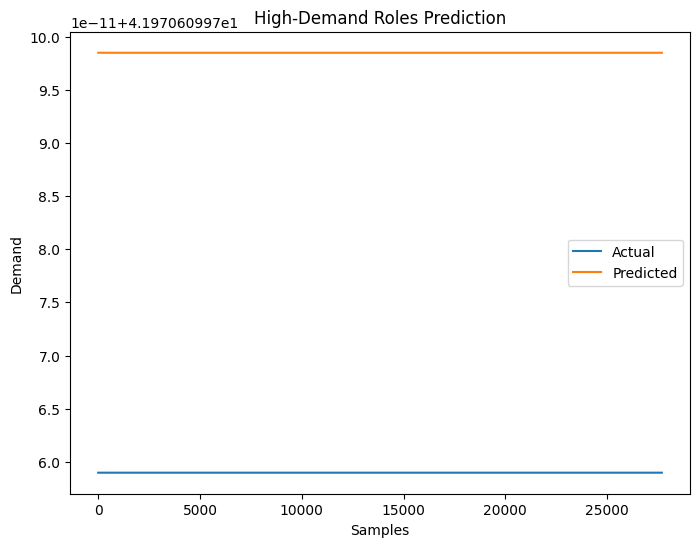

In [48]:
# Visualization of predictions
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("High-Demand Roles Prediction")
plt.xlabel("Samples")
plt.ylabel("Demand")
plt.show()

The above code helps to generates a line plot to compare actual versus predicted values for high-demand roles

**Task 4: Comparative Salary Analysis by Region**

In [49]:
# Visualize average salaries by region
region_salaries = Cleaned_Dataset.groupby('country')['budget'].mean().sort_values(ascending=False)
px.bar(region_salaries, title="Average Salary by Region", labels={'value': 'Average Salary', 'region': 'Region'}).show()

In [50]:
import plotly.express as px

# Group data by region/country and compute average salary
region_salary = Cleaned_Dataset.groupby('country')['budget'].mean().reset_index()

# Rename columns for clarity in visualization
region_salary.columns = ['Region', 'Average Salary']

# Create the choropleth map
fig = px.choropleth(
    region_salary,
    locations='Region',  # Region column with country names
    locationmode='country names',  # Use country names as location keys
    color='Average Salary',  # Data to color the map
    color_continuous_scale='Viridis',  # Color scale
    title="Average Salary by Region",
    labels={'Average Salary': 'Salary (USD)'}
)

# Adjust layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(title="Average Salary (USD)")
)

# Display the map
fig.show()


This visualization effectively highlights salary differences by region, providing a clear overview of geographical disparities and helping stakeholders make informed decisions related to compensation and workforce distribution.

**Task 5: Building a Job Recommendation Engine**

In [51]:
!pip install streamlit

In [52]:
import streamlit as st

# Simple Recommendation Engine
def recommend_jobs(skill, location, salary_expectation):
    recommendations = Cleaned_Dataset[
        (Cleaned_Dataset['skills'].str.contains(skill, case=False)) &
        (Cleaned_Dataset['country'] == location) &
        (Cleaned_Dataset['budget'] >= salary_expectation)
    ]
    return recommendations

st.title("Personalized Job Recommendation")
skill = st.text_input("Enter your skill:")
location = st.selectbox("Select your preferred location:", Cleaned_Dataset['country'].unique())
salary_expectation = st.slider("Minimum expected salary:", int(Cleaned_Dataset['budget'].min()), int(Cleaned_Dataset['budget'].max()))

if st.button("Find Jobs"):
    recommended_jobs = recommend_jobs(skill, location, salary_expectation)
    st.write(recommended_jobs)

2025-01-10 08:09:30.886 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 08:09:31.165 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-10 08:09:31.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 08:09:31.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 08:09:31.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 08:09:31.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 08:09:31.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 08:09:31.182 Session state does not 

**Task 6: Monitoring Workforce Dynamics**




In [53]:
def visualize_trends():
    monthly_trends = Cleaned_Dataset.groupby(Cleaned_Dataset['published_date'].dt.to_period('M')).size()

    # Convert PeriodIndex to strings for JSON serialization
    monthly_trends = monthly_trends.reset_index()
    monthly_trends['published_date'] = monthly_trends['published_date'].astype(str)

    px.line(monthly_trends, x='published_date', y=0, title="Monthly Job Posting Trends", labels={'0': 'Number of Postings', 'published_date': 'Month'}).show()

    visualize_trends()

In [54]:
Cleaned_Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'keywords', 'job_category_encoded'],
      dtype='object')

**Task 7: Remote Work Landscape Analysis**

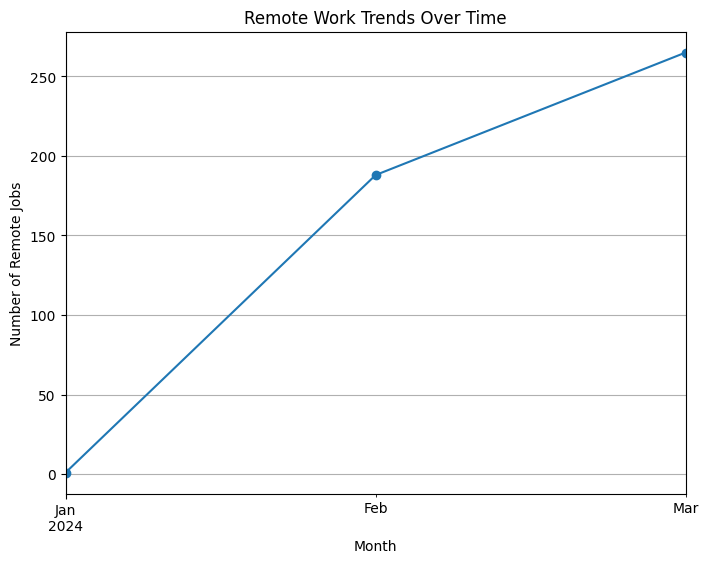

In [55]:
remote_jobs = Cleaned_Dataset[Cleaned_Dataset['title'].str.contains('remote', case=False, na=False)]
remote_trends = remote_jobs.groupby(remote_jobs['published_date'].dt.to_period('M')).size()

plt.figure(figsize=(8, 6))
remote_trends.plot(kind='line', marker='o')
plt.title("Remote Work Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Remote Jobs")
plt.grid()
plt.show()

The code generates a line chart to visualize the trend of remote job postings over time.

**Task 8: Predicting Future Workforce Trends**

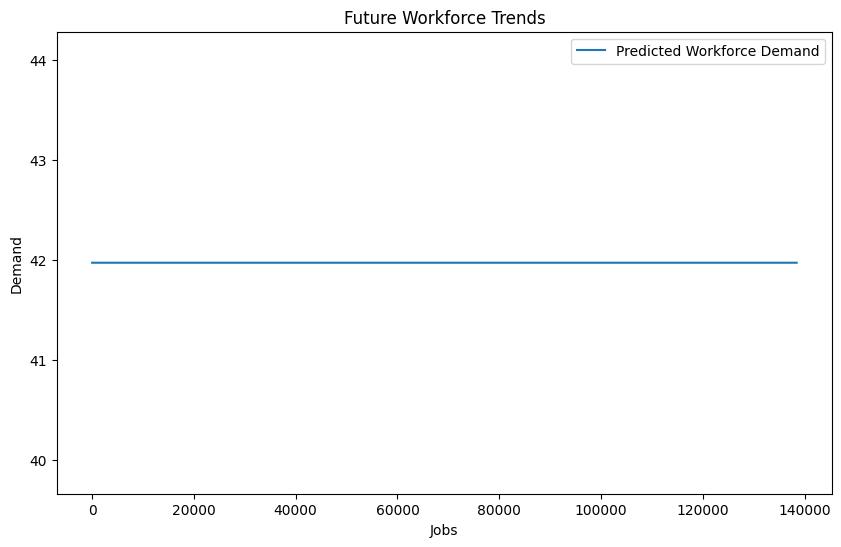

In [56]:
# Predict future workforce trends
future_trends = model.predict(X)  # Use existing model
plt.figure(figsize=(10, 6))
plt.plot(future_trends, label='Predicted Workforce Demand')
plt.title("Future Workforce Trends")
plt.xlabel("Jobs")
plt.ylabel("Demand")
plt.legend()
plt.show()

The code generates a line chart to visualize predicted future workforce demand using a trained model.

In [57]:
import pickle

In [58]:
# Creating the pipeline with a RandomForest model
rf_model = Pipeline([  # Assign the Pipeline to rf_model
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [59]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(rf_model) # Now rf_model is defined
print(type(rf_model))

<class 'sklearn.pipeline.Pipeline'>
